## Esercizio Classificazione NLP1

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'
df = pd.read_csv(path)
df

,text,class
0,b'insane ( but inspired ) musical about alferd...,1
1,b'written by david j . schow and john shirley ...,0
2,"b'miramax "" disinvited "" on-line media from pr...",0
3,"b'in "" the astronaut\'s wife , "" charlize ther...",0
4,b'one of the 90s\' most unwelcome thriller tre...,0
...,...,...
408,"b'hav plenty , as we are told in the beginning...",0
409,b'brian de palma\'s snake eyes stars nicolas c...,0
410,b'contact ( pg ) there\'s a moment late in rob...,1
411,"b""this is a film that i was inclined to like a...",0


In [3]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
df = pd.read_csv(path)

patterns = {
            r'\s+': ' ',            # prima e dopo come ultima sostituisce tutti i multipli spazi con uno spazio
            #r'......': '',          
            #r'......': '',         #aggiungere nuove regex qui
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

words_to_remove = ['gargamella', 'doggy', 'word3']  # List of words to remove

# Add a new pattern to remove specific words
word_pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
patterns[word_pattern] = ''

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,class
0,insane but inspired musical about alferd pack...,1
1,written david schow and john shirley based th...,0
2,miramax disinvited line media from press scre...,0
3,the astronaut wife charlize theron plays youn...,0
4,one the most unwelcome thriller trends return...,0
...,...,...
408,hav plenty are told the beginning and reminde...,0
409,brian palma snake eyes stars nicolas cage evi...,0
410,contact there moment late robert zemeckis con...,1
411,this film that was inclined like the outset t...,0


In [4]:
# applichiamo la regex
df = clean_column(df, 'text', patterns)
df

,text,class
0,insane but inspired musical about alferd pack...,1
1,written david schow and john shirley based th...,0
2,miramax disinvited line media from press scre...,0
3,the astronaut wife charlize theron plays youn...,0
4,one the most unwelcome thriller trends return...,0
...,...,...
408,hav plenty are told the beginning and reminde...,0
409,brian palma snake eyes stars nicolas cage evi...,0
410,contact there moment late robert zemeckis con...,1
411,this film that was inclined like the outset t...,0


In [5]:
df['text'][0]

' insane but inspired musical about alferd packer the first man ever tried for cannibalism america the story unfolds learn what events led packer trey parker supposedly killing and eating the five men who got lost while accompanying him through the mountains colorado search gold throughout packer must contend with evil trappers bent stealing his prized horse tribe ute indians that doesn seem quite the mark and terrible winter storm that leads the eventual cannibalism parker obviously knows his musicals very well because the viewer also treated some the most maddeningly catchy songs appear film would accomplish this again his post cannibal musical motion picture south park bigger longer and uncut apart from the inherent interest seeing pre south park parker and stone their first effort cannibal also offers some pretty decent laughs the aforementioned ute indian tribe that packer group encounters definite highlight are two rousing musical numbers about snowmen one which ends comedically 

In [6]:
text = list(map(str, df['text']))
text = ''.join(text)

(-0.5, 799.5, 399.5, -0.5)

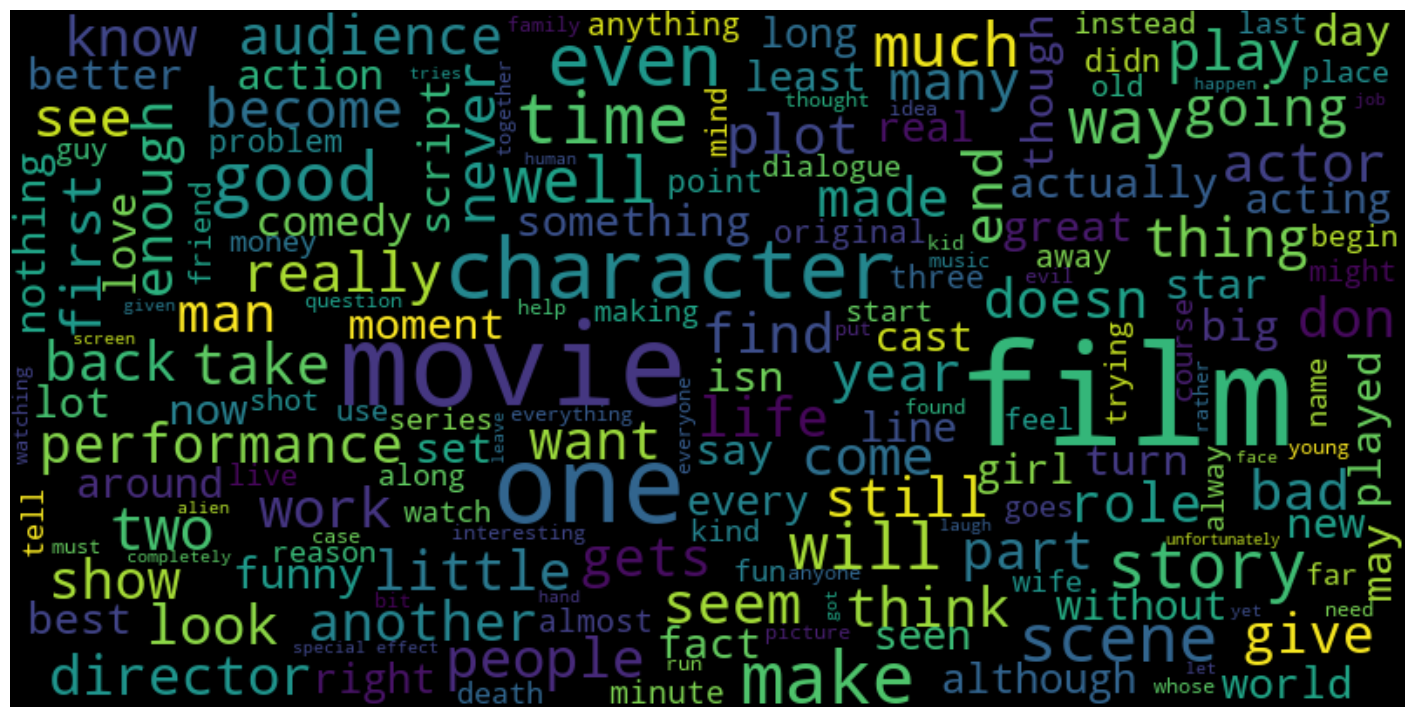

In [7]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [27]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [28]:
#df = df.dropna()

In [29]:
##STEP 3: Definizre X e y (features testuali e Target)

X = df['text']
y = df['class']

In [30]:
##STEP 4: Vettorizzazione - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7) #solo se errore memoria
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
X_vect.shape

(413, 20407)

In [32]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
X_tfidf.shape

(413, 20407)

In [34]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [35]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.7096774193548387

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6854838709677419

In [37]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        88
           1       0.00      0.00      0.00        36

    accuracy                           0.69       124
   macro avg       0.35      0.48      0.41       124
weighted avg       0.50      0.69      0.58       124



Text(95.72222222222221, 0.5, 'Actual')

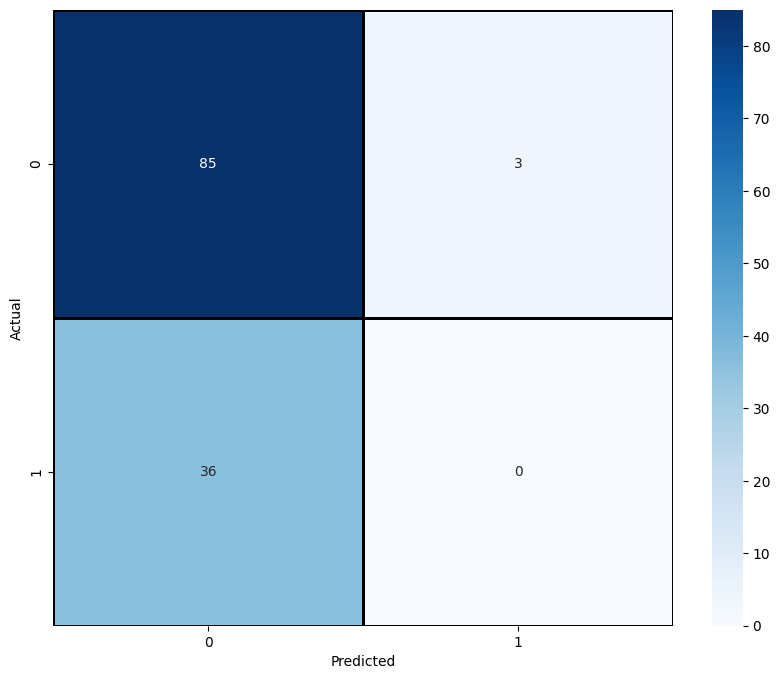

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.7096774193548387

In [40]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7258064516129032


In [41]:
#labels = ['Class0', 'Class1']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        88
           1       0.54      0.42      0.47        36

    accuracy                           0.73       124
   macro avg       0.66      0.63      0.64       124
weighted avg       0.71      0.73      0.71       124



Text(95.72222222222221, 0.5, 'Actual')

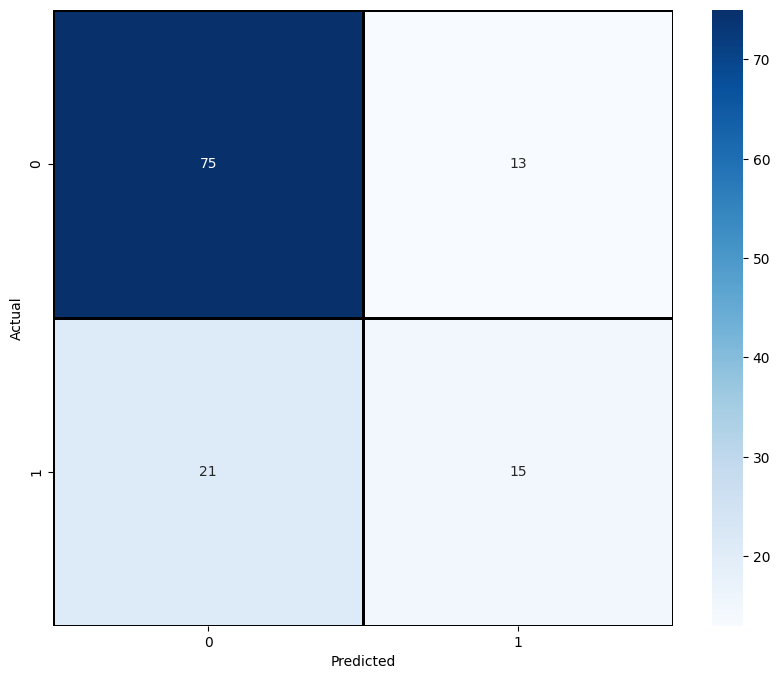

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.78846154 0.78846154 0.75       0.78846154 0.78846154 0.7254902
 0.8627451  0.74509804]
mean=0.7796474358974359
std=0.03908582377386029


In [44]:
import joblib
joblib.dump(pipe,'NLPEs1.pkl')

['NLPEs1.pkl']

In [45]:
import joblib

uploaded_model = joblib.load('NLPEs1.pkl')
pred = uploaded_model.predict(['very girl']) # 1 --> 
pred[0]

0